# Analisis of pokemon dataset

## Reading data

In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('./Pokemon.csv')

data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [4]:
# Read Headers
data.columns


Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [5]:
# Read each Column
data['Name'].head()

0                Bulbasaur
1                  Ivysaur
2                 Venusaur
3    VenusaurMega Venusaur
4               Charmander
Name: Name, dtype: object

In [6]:
# Read couple of colums
data[['Name', 'Type 1', 'HP']].head()

,Name,Type 1,HP
0,Bulbasaur,Grass,45
1,Ivysaur,Grass,60
2,Venusaur,Grass,80
3,VenusaurMega Venusaur,Grass,80
4,Charmander,Fire,39


In [7]:
# Read row
data.iloc[1]

#                   2
Name          Ivysaur
Type 1          Grass
Type 2         Poison
Total             405
HP                 60
Attack             62
Defense            63
Sp. Atk            80
Sp. Def            80
Speed              60
Generation          1
Legendary       False
Name: 1, dtype: object

In [13]:
data.iloc[2, 1]

'Venusaur'

In [8]:
# Get rows on specific condition

data.loc[data['Type 1'] == 'Fire'].head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False


## Making changes to data

In [9]:
data['Total'] = data['HP'] + data['Attack'] + data['Defense'] + data['Sp. Atk'] + data['Sp. Def'] + data['Speed']

# data = data.drop(columns= ['Total'])

# data['Total'] = data.iloc[:, 4:10].sum(axis= 1)

# data = data[['Total', 'HP', 'Defense']]

data.replace({"True": 1, "False": 0}, inplace= True)
data = data.astype({"Legendary": np.int64})

data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,0
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,0
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,0
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,0
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,0


In [92]:
data.corr()['Legendary']

#             0.153396
Total         0.501758
HP            0.273620
Attack        0.345408
Defense       0.246377
Sp. Atk       0.448907
Sp. Def       0.363937
Speed         0.326715
Generation    0.079794
Legendary     1.000000
Name: Legendary, dtype: float64

## Visualization

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
color_dict = {
    "Grass":"#071e22",
    "Fire":"#a41623",
    "Water":"#679289",
    "Bug":"#f4c095",
    "Normal":"#ee2e31",
    "Poison":"#ffb563",
    "Electric":"#918450",
    "Ground":"#f85e00",
    "Fairy":"#1d7874", 
    "Fighting":"#9a031e",
    "Psychic":"#d6d6d6",
    "Rock":"#ffee32",
    "Ghost":"#333533",
    "Ice":"#ffd100",
    "Dragon":"#202020",
    "Dark":"#352692",
    "Steel":"#5f0f40",
    "Flying":"#9a031e"
}

### Scatter Plot

<AxesSubplot:xlabel='Attack', ylabel='Total'>

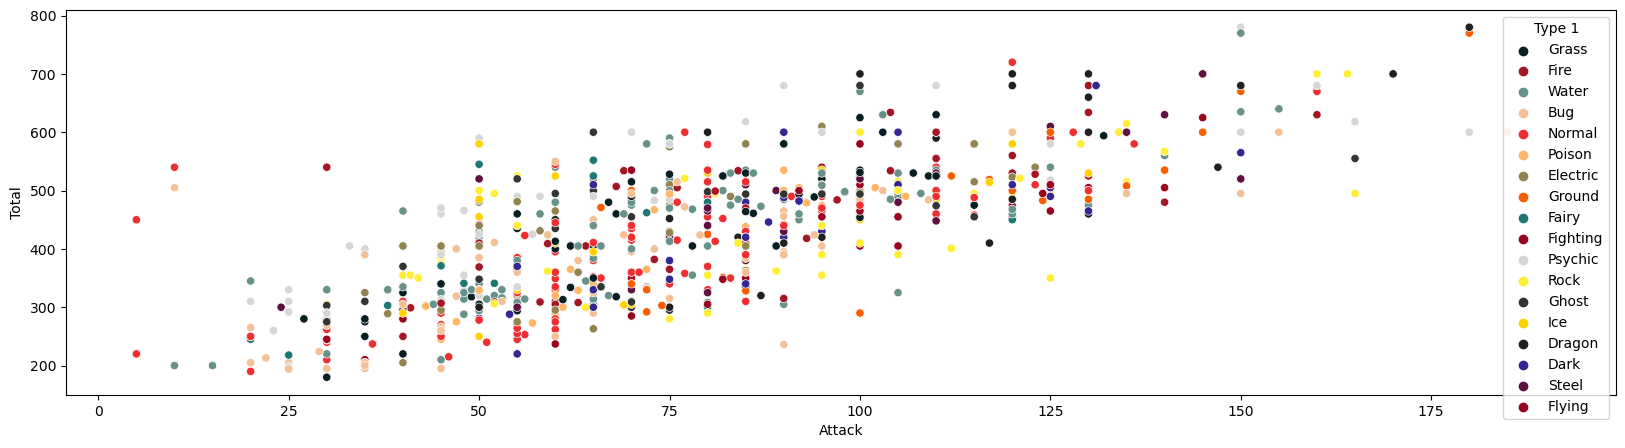

In [54]:
fig, axs = plt.subplots(ncols= 1, figsize= (20, 5))

sns.scatterplot(x= 'Attack', y= 'Total', data= data, hue= 'Type 1', palette= list(color_dict.values()), ax= axs)

### Histogram plot

<AxesSubplot:xlabel='Total', ylabel='Count'>

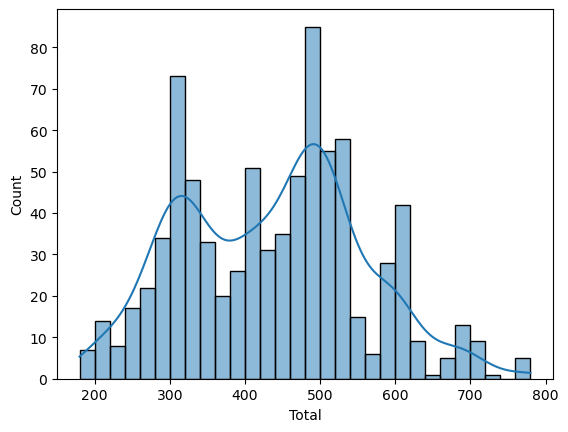

In [68]:
sns.histplot(data['Total'], kde= True, bins= 30)

### Dist Plot

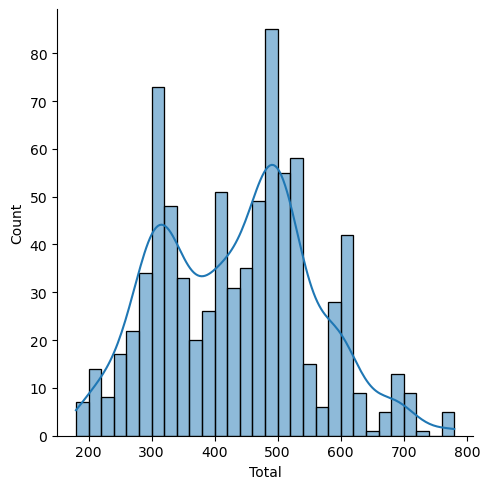

In [69]:
sns.displot(data['Total'], kde= True, bins= 30)

### Bar Plot

<AxesSubplot:xlabel='Type 1', ylabel='Total'>

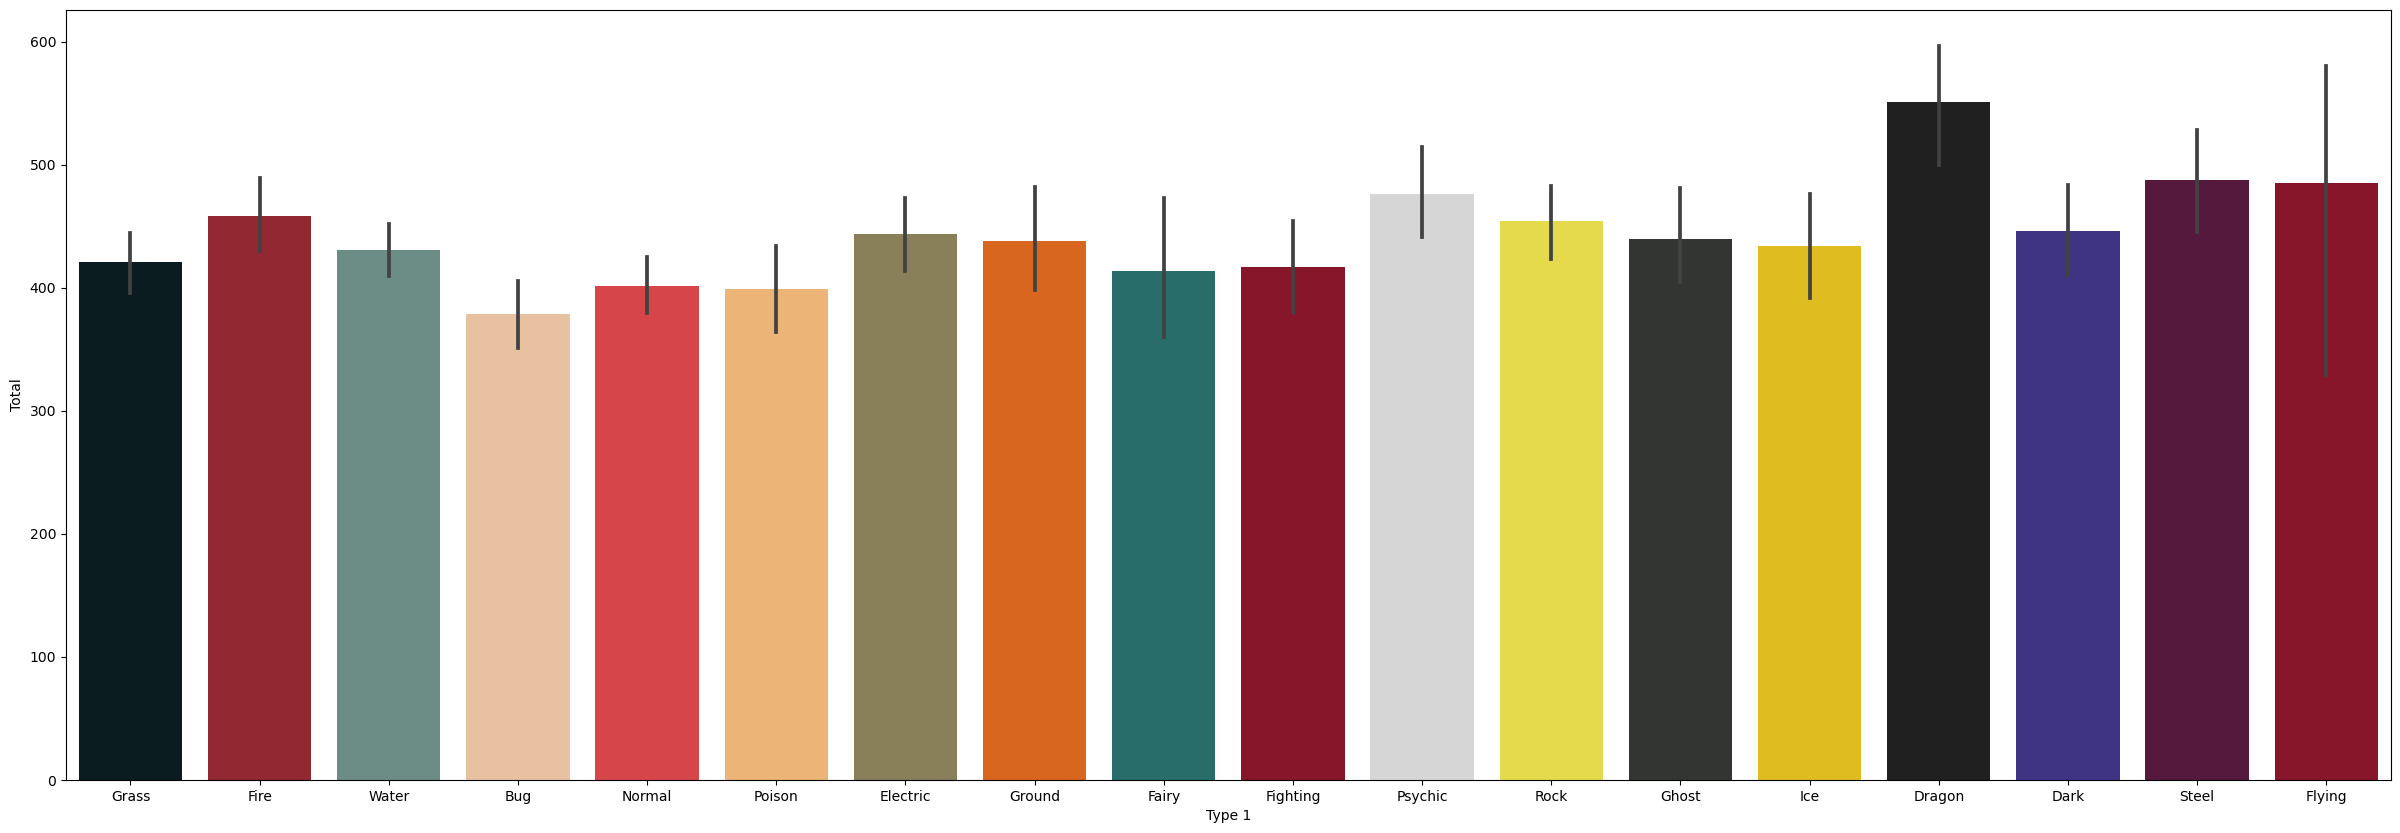

In [44]:
fig, axs = plt.subplots(ncols= 1, figsize= (30, 10))

sns.barplot(x= 'Type 1', y= 'Total', data= data, palette= list(color_dict.values()), ax= axs)

### Box Plot

<AxesSubplot:xlabel='Legendary', ylabel='Total'>

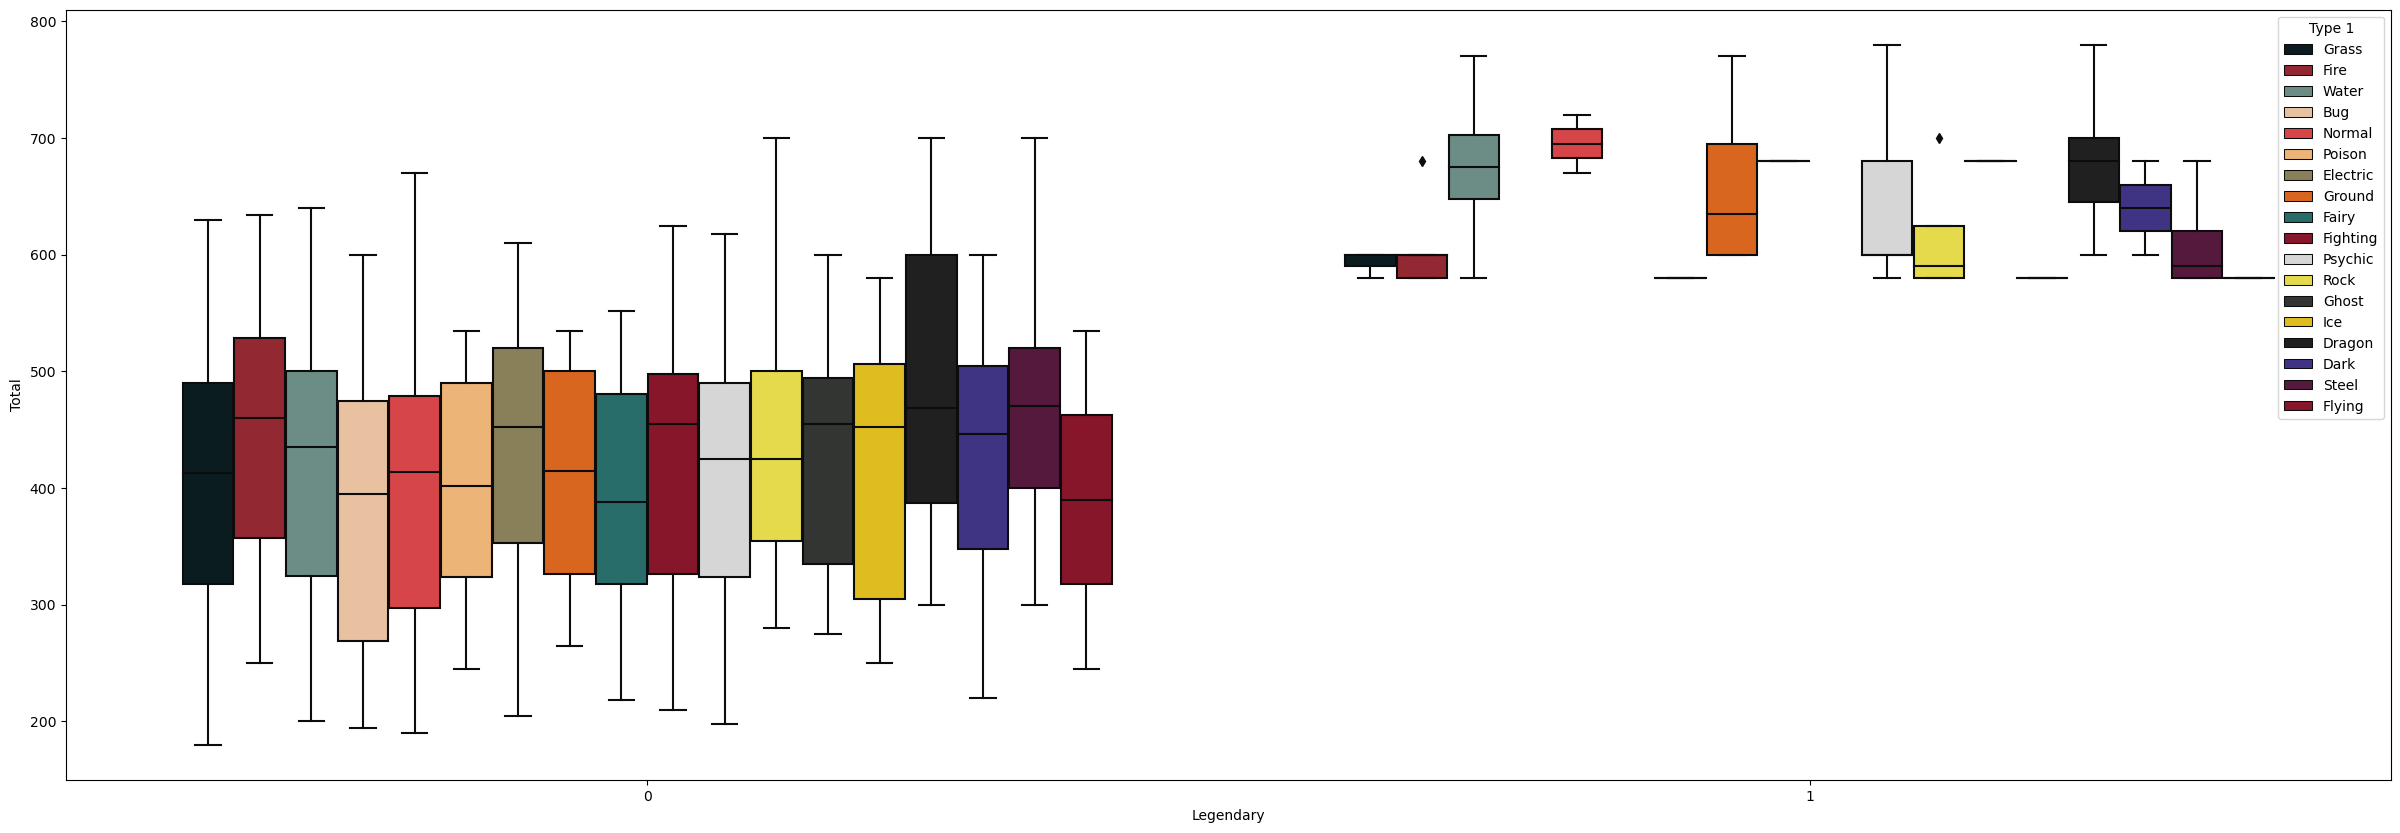

In [43]:
fig, axs = plt.subplots(ncols= 1, figsize= (30, 10))

sns.boxplot(x= 'Legendary', y= 'Total', data= data, hue= 'Type 1', palette= list(color_dict.values()), ax= axs)

### Strip Plot

<AxesSubplot:xlabel='Legendary', ylabel='Total'>

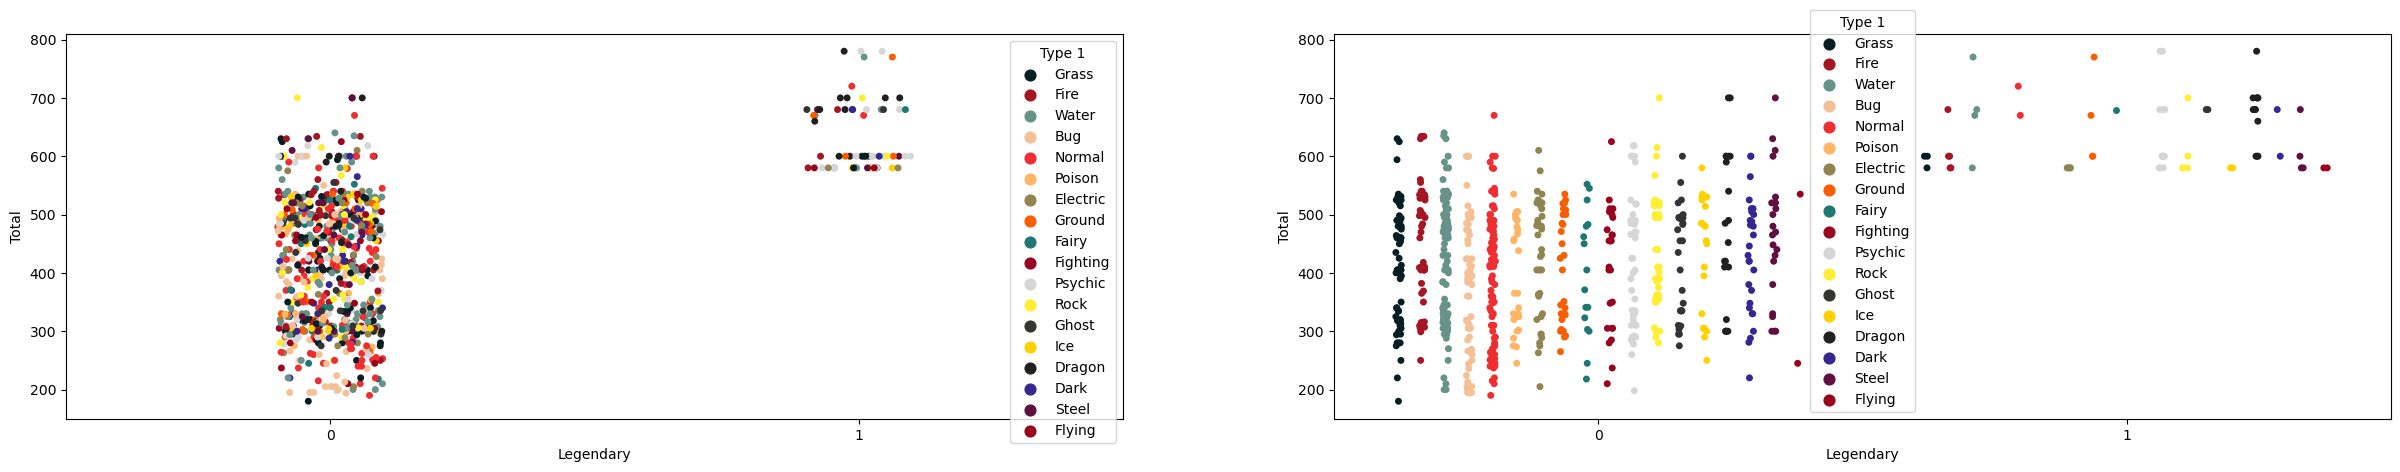

In [33]:
fig, axs = plt.subplots(ncols= 2, figsize= (30, 5))

sns.stripplot(x= 'Legendary', y= 'Total', hue= 'Type 1', data= data, ax= axs[0], palette= list(color_dict.values()))
sns.stripplot(x= 'Legendary', y= 'Total', hue= 'Type 1', dodge= True, data= data, ax= axs[1], palette= list(color_dict.values()))

### Heat Map

<AxesSubplot:>

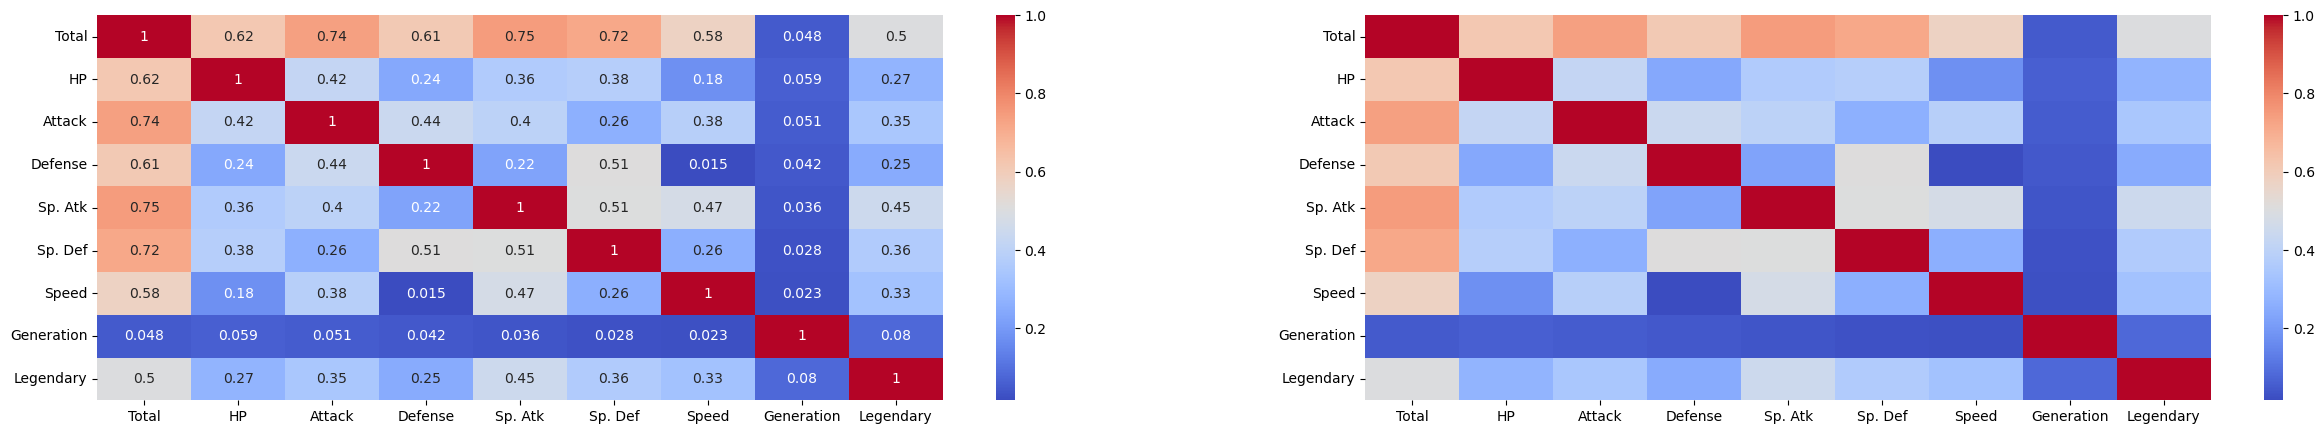

In [106]:
fig, axs = plt.subplots(ncols= 2, figsize= (30, 5))

sns.heatmap(data.drop('#', axis= 1).corr().abs(), annot= True, ax= axs[0], cmap= 'coolwarm')
sns.heatmap(data.drop('#', axis= 1).corr().abs(), ax= axs[1], cmap= 'coolwarm')

### Cluster Map

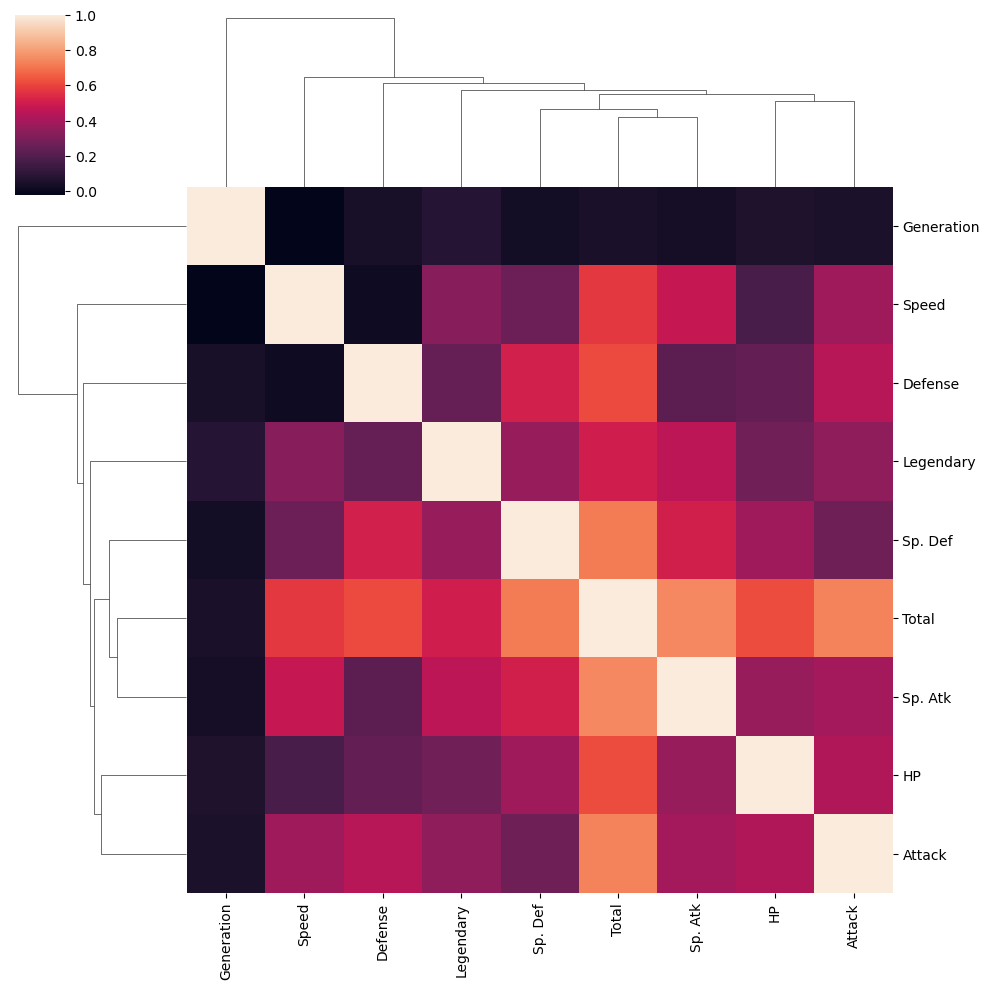

In [104]:
sns.clustermap(data.drop('#', axis= 1).corr())

### Violin Plot

<AxesSubplot:xlabel='Legendary', ylabel='Total'>

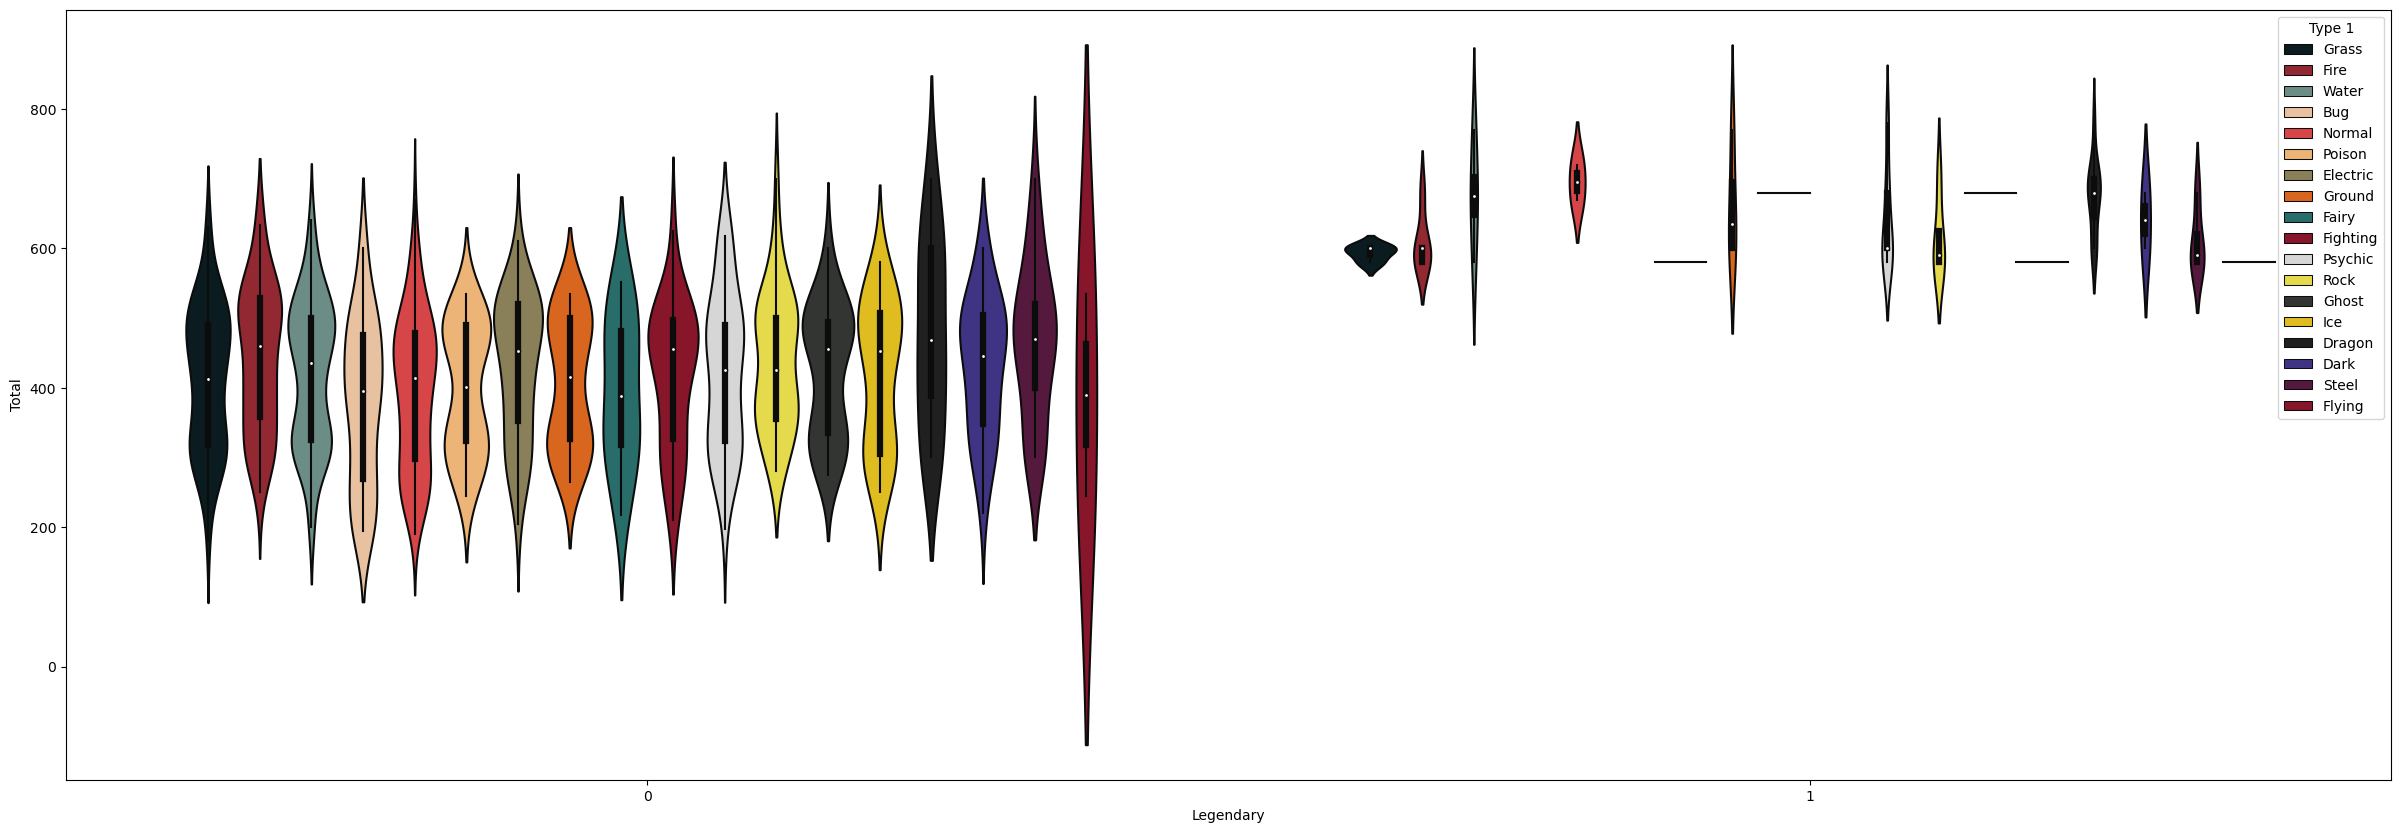

In [42]:
fig, axs = plt.subplots(ncols= 1, figsize= (30, 10))

sns.violinplot(x= 'Legendary', y= 'Total', hue= 'Type 1', data= data, palette= list(color_dict.values()), ax= axs)